In [8]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)

In [9]:
#創建tensor
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]  #攝氏
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  #他國
t_c = torch.tensor(t_c).unsqueeze(1)    #攝氏轉為多維陣列，第1軸增加1軸
t_u = torch.tensor(t_u).unsqueeze(1)    #他國轉為多維陣列，第1軸增加1軸

t_u.shape

torch.Size([11, 1])

In [10]:
linear_model = nn.Linear(1, 1)    #利用nn模組替換
optimize = torch.optim.SGD(linear_model.parameters(),
                           lr=1e-2    #學習率
                           )

In [11]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 1,  0,  6,  7,  3, 10,  8,  9,  2]), tensor([5, 4]))

In [12]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [13]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[-1.1139],
        [-1.1794]], grad_fn=<AddmmBackward0>)

In [14]:
linear_model.weight

Parameter containing:
tensor([[-0.0885]], requires_grad=True)

In [15]:
linear_model.bias

Parameter containing:
tensor([-0.6809], requires_grad=True)

In [16]:
x = torch.ones(1)
linear_model(x)

tensor([-0.7694], grad_fn=<AddBackward0>)

In [17]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694],
        [-0.7694]], grad_fn=<AddmmBackward0>)

In [18]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [33]:
linear_model.parameters()   #模型轉換傳給優化器

<generator object Module.parameters at 0x7efd6be5ff90>

In [34]:
list(linear_model.parameters())   #輸出成串列

[Parameter containing:
 tensor([[5.3836]], requires_grad=True),
 Parameter containing:
 tensor([-17.0653], requires_grad=True)]

In [35]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)    #將訓練資料輸入模型
        loss_train = loss_fn(t_p_train, t_c_train)    #計算訓練損失

        t_p_val = model(t_u_val)     #將驗證資料輸入模型
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            #印出訓練損失與驗證損失
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [36]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)   #定義優化器

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 145.9347, Validation loss 48.0279
Epoch 1000, Training loss 3.5585, Validation loss 3.9193
Epoch 2000, Training loss 2.9792, Validation loss 3.3777
Epoch 3000, Training loss 2.9693, Validation loss 3.3140

Parameter containing:
tensor([[5.3835]], requires_grad=True)
Parameter containing:
tensor([-17.0643], requires_grad=True)


In [37]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)   #定義優化器

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),   #此處不再用手寫的損失函數
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 203.9790, Validation loss 89.5221
Epoch 1000, Training loss 3.5175, Validation loss 3.8954
Epoch 2000, Training loss 2.9785, Validation loss 3.3751
Epoch 3000, Training loss 2.9693, Validation loss 3.3137

Parameter containing:
tensor([[5.3837]], requires_grad=True)
Parameter containing:
tensor([-17.0657], requires_grad=True)


In [38]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),     #指定模組要有13個神經元
            nn.Tanh(),
            nn.Linear(13, 1))     #此層的第0軸必須和上一層的第1軸相同，都是13
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [39]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [40]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [41]:
from collections import OrderedDict   #匯入相關模組

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),   #將第1個模組命名為hidden_linear
    ('hidden_activation', nn.Tanh()),     #將第2個模組命名為hidden_activation
    ('output_linear', nn.Linear(8, 1))    #將第3個模組命名為output_linear
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [42]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [43]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1730], requires_grad=True)

In [44]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)    #為了讓結果更穩定，稍微將學習率降低一點

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))    #將驗證集輸入模型並列其輸出
print('answer', t_c_val)    #列印出驗證集的真實答案
print('hidden', seq_model.hidden_linear.weight.grad)    #印出隱藏層中所有weight參數的梯度

Epoch 1, Training loss 230.1152, Validation loss 111.4127
Epoch 1000, Training loss 4.6833, Validation loss 3.2106
Epoch 2000, Training loss 4.3949, Validation loss 0.6982
Epoch 3000, Training loss 2.8170, Validation loss 0.6094
Epoch 4000, Training loss 2.3210, Validation loss 0.6176
Epoch 5000, Training loss 2.1693, Validation loss 0.6500
output tensor([[ 8.0719],
        [12.8836]], grad_fn=<AddmmBackward0>)
answer tensor([[ 8.],
        [11.]])
hidden tensor([[-12.0342],
        [  0.5307],
        [ -0.5332],
        [  8.9310],
        [ 11.2653],
        [  0.0145],
        [  0.5125],
        [ 12.0282]])


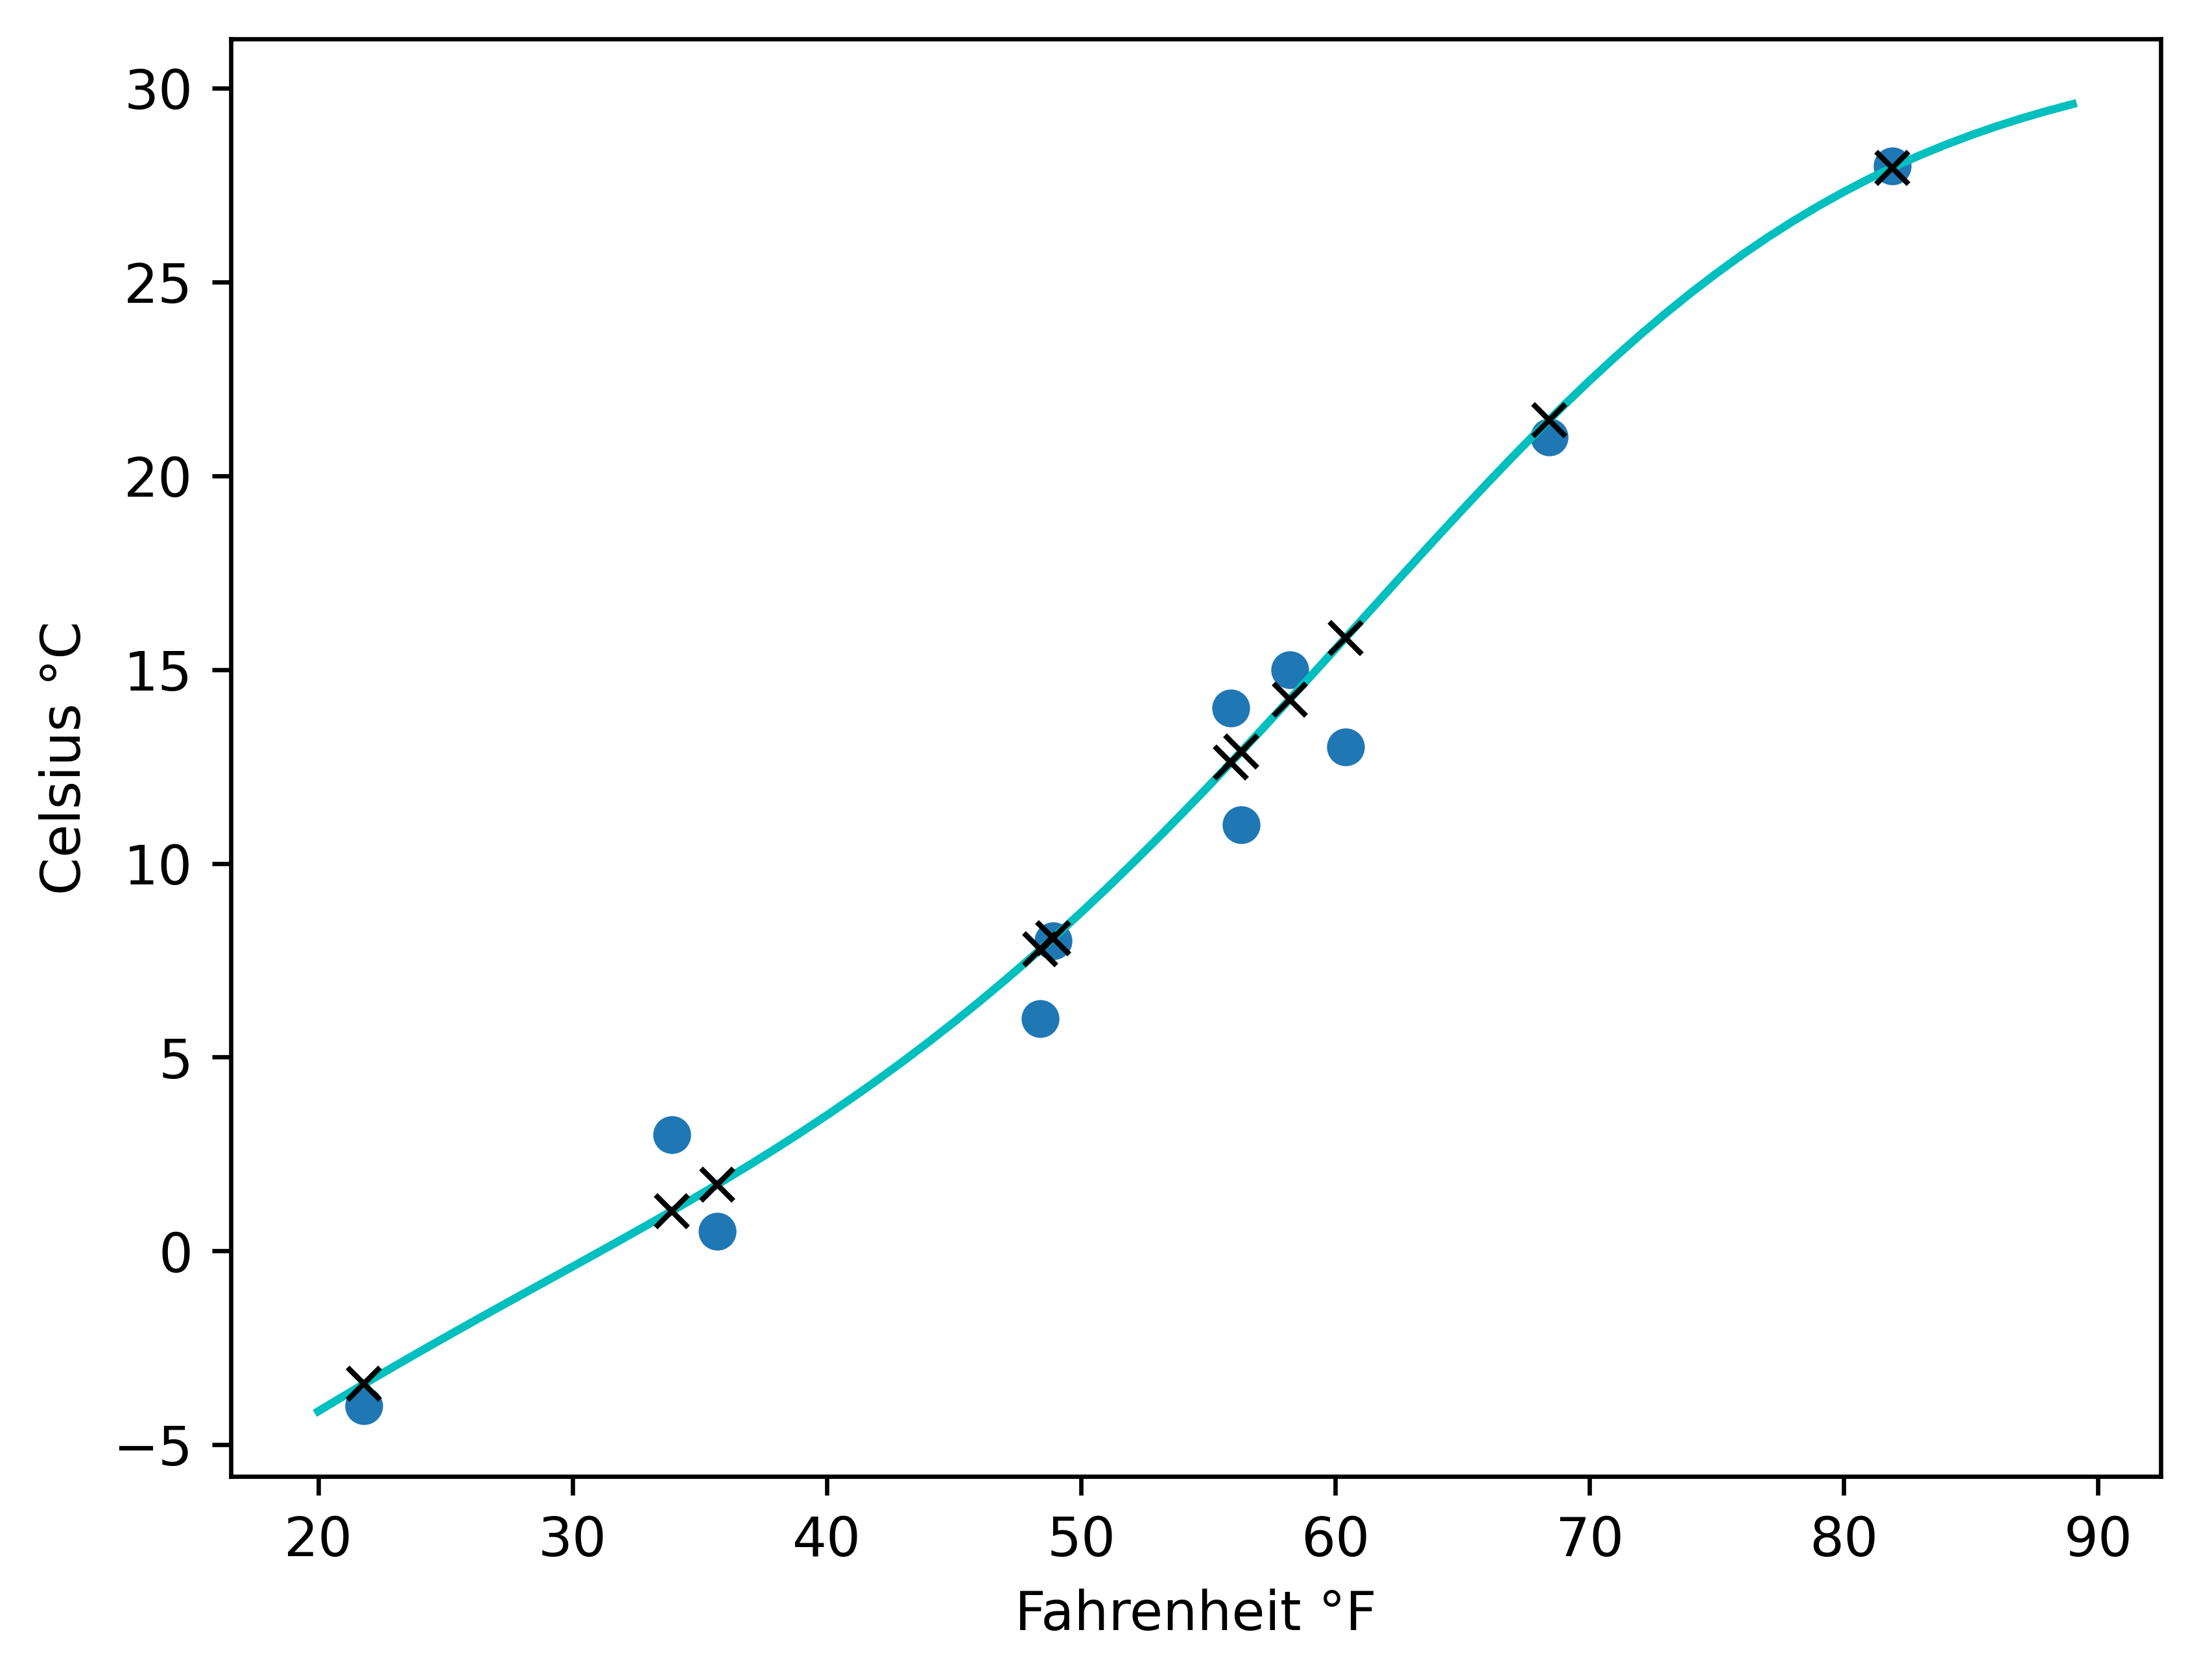

In [47]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit °F")
plt.ylabel("Celsius °C")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')   #描繪出真實的資料點
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')    #描繪出預測的資料點


Epoch 1, Training loss 201.2834, Validation loss 86.3508
Epoch 1000, Training loss 60.3675, Validation loss 3.2937
Epoch 2000, Training loss 36.1710, Validation loss 4.6477
Epoch 3000, Training loss 18.6183, Validation loss 4.8789
Epoch 4000, Training loss 10.2497, Validation loss 4.7069
Epoch 5000, Training loss 6.7036, Validation loss 4.3751


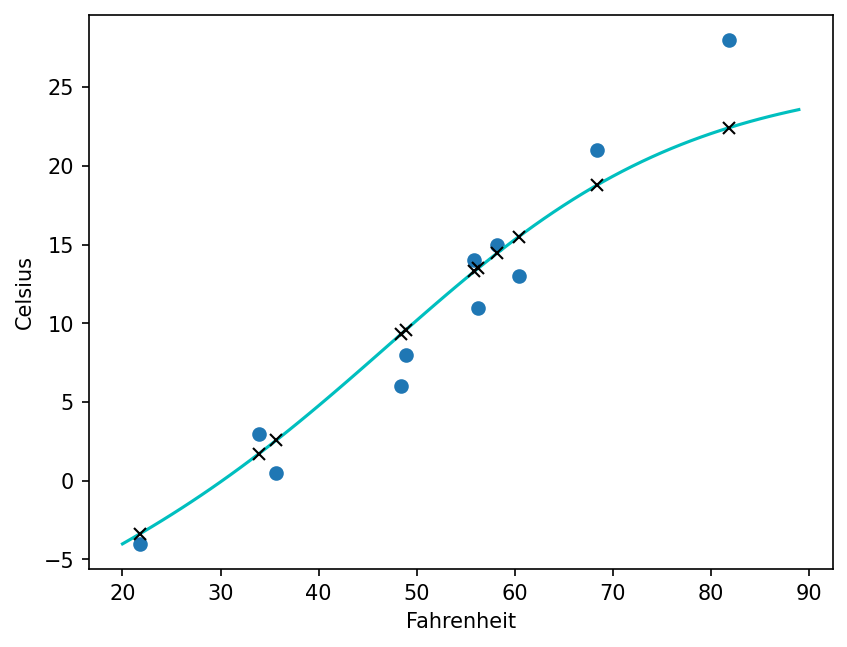

In [32]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
